In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

MNIST data from openml is shuffled

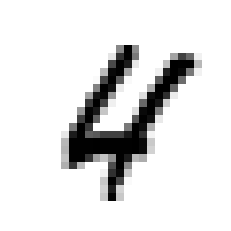

labelled as 4


In [6]:
r=random.randint(0,len(X))
some_digit=X[r]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
some_digit_label=y[r]
print('labelled as',some_digit_label)

In [7]:
X_train, X_test, y_train, y_test = X[:56000], X[56000:], y[:56000], y[56000:]

# Multilevel Classifier

SGD classifier

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [9]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4], dtype=int8)

In [10]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -348187.52150907,  -740549.59834685,  -273988.72775681,
        -1000352.46322577,   196611.96059068,  -410426.8966096 ,
         -386969.6270089 ,  -425361.36507027,     1975.82629274,
         -270967.61984202]])

In [11]:
np.argmax(some_digit_scores)

4

Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([4], dtype=int8)

In [14]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.1, 0. , 0.5, 0. , 0. , 0. , 0.3, 0.1]])

## Model Selection

In [15]:
from sklearn.model_selection import cross_val_predict

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

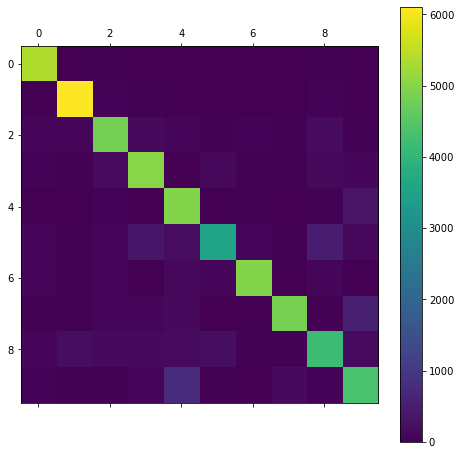

In [18]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(conf_mx_sgd)

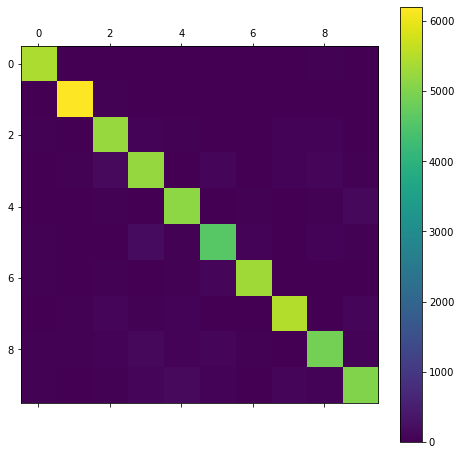

In [19]:
y_train_pred2 = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx_forest = confusion_matrix(y_train, y_train_pred2)
plot_confusion_matrix(conf_mx_forest)

### Random Forest Classifier confusion matrix shows much better recall and precision for all classes 0-9

# Prediction on test data

y_test_pred2 = cross_val_predict(forest_clf, X_test, y_test, cv=3)
conf_mx_forest = confusion_matrix(y_test, y_test_pred2)
plot_confusion_matrix(conf_mx_forest)

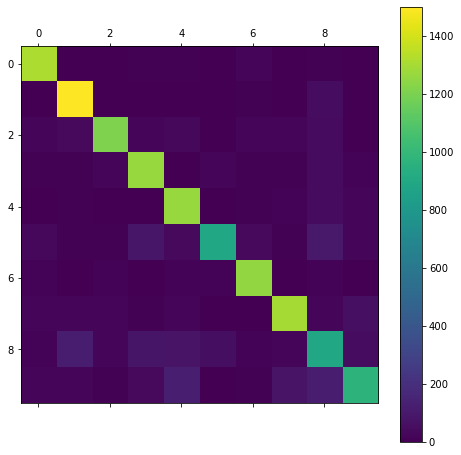

In [20]:
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3)
conf_mx_sgd = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mx_sgd)

In [21]:
forest_clf.fit(X_train, y_train)
r2=random.randint(0,len(X_test))
some_digit2=X_test[r2]
pred_some_digit2=forest_clf.predict([some_digit2])

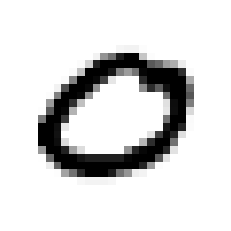

labelled as 0 our prediction [0]


In [22]:
some_digit2_image = some_digit2.reshape(28, 28)
plt.imshow(some_digit2_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
some_digit_label=y_test[r2]
print('labelled as',some_digit_label, 'our prediction', pred_some_digit2)

In [23]:
y_test_pred_forest=forest_clf.predict(X_test)

In [24]:
from sklearn.metrics import precision_score, recall_score

In [30]:
precision_score(y_test,y_test_pred_forest, average=None), recall_score(y_test,y_test_pred_forest,average=None)

(array([0.95621469, 0.9779319 , 0.94129834, 0.91897507, 0.94460432,
        0.94146341, 0.9715994 , 0.96059783, 0.94528875, 0.94117647]),
 array([0.98616169, 0.98852772, 0.95314685, 0.93913659, 0.95421512,
        0.92418196, 0.97087379, 0.95347269, 0.91135531, 0.91493924]))